In [ ]:
# 28th March 2024
# CSC461 – Assignment2 – IDS – DataVisualization
# Muhammad Faizan
# CIIT/LHR/FA21-BSE-32
# To plot graphs

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [22]:
population_data = pd.read_csv ("world_pop.csv");

top_10_2020 = population_data.sort_values(by = 'year_2020', ascending = False).head (10)

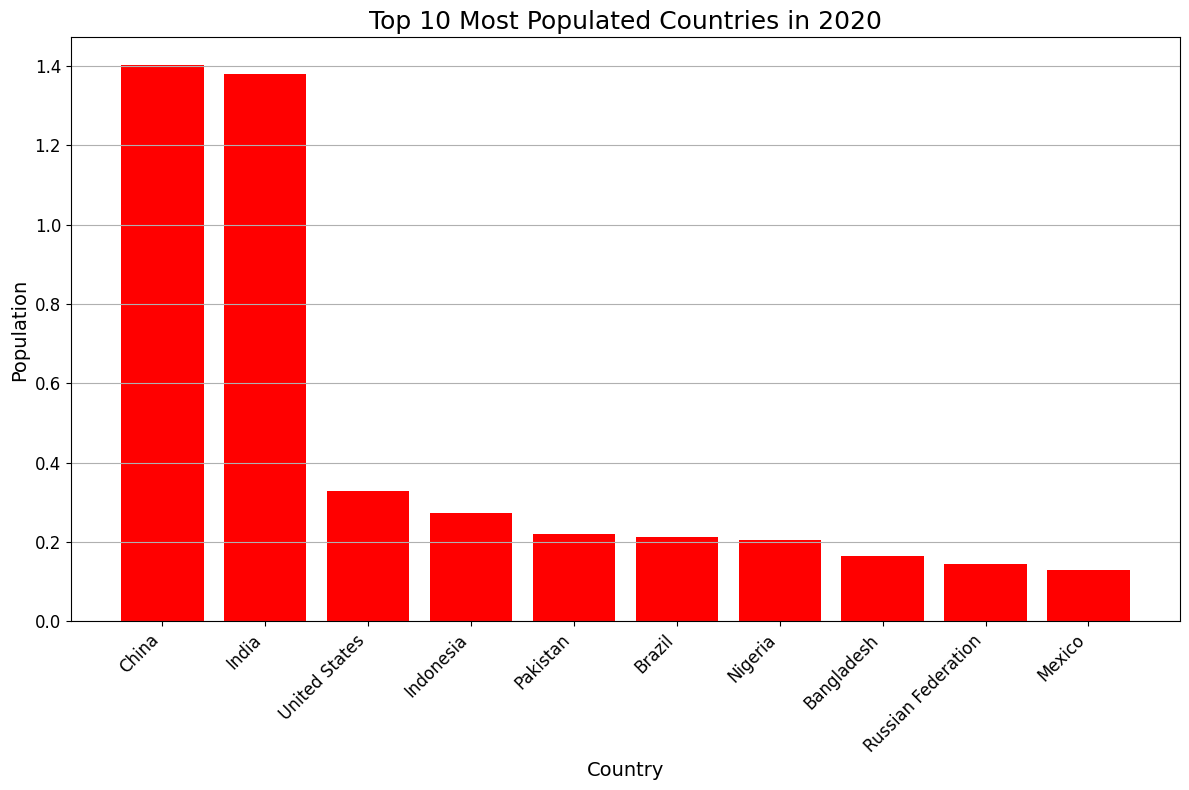

In [16]:
plt.figure (figsize = (12, 8))

plt.bar (top_10_2020 ['country'], top_10_2020 ['year_2020'] / 1e9, color = 'red')

plt.title ('Top 10 Most Populated Countries in 2020', fontsize = 18)
plt.xlabel ('Country', fontsize = 14)
plt.ylabel ('Population', fontsize = 14)
plt.xticks (rotation = 45, ha = 'right', fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid (axis = 'y')
plt.tight_layout ()
plt.show ()

Question no. 02: Using the world population dataset (from Q1)


• Show the population of 10 least populous ountries in 2015 using a chart.

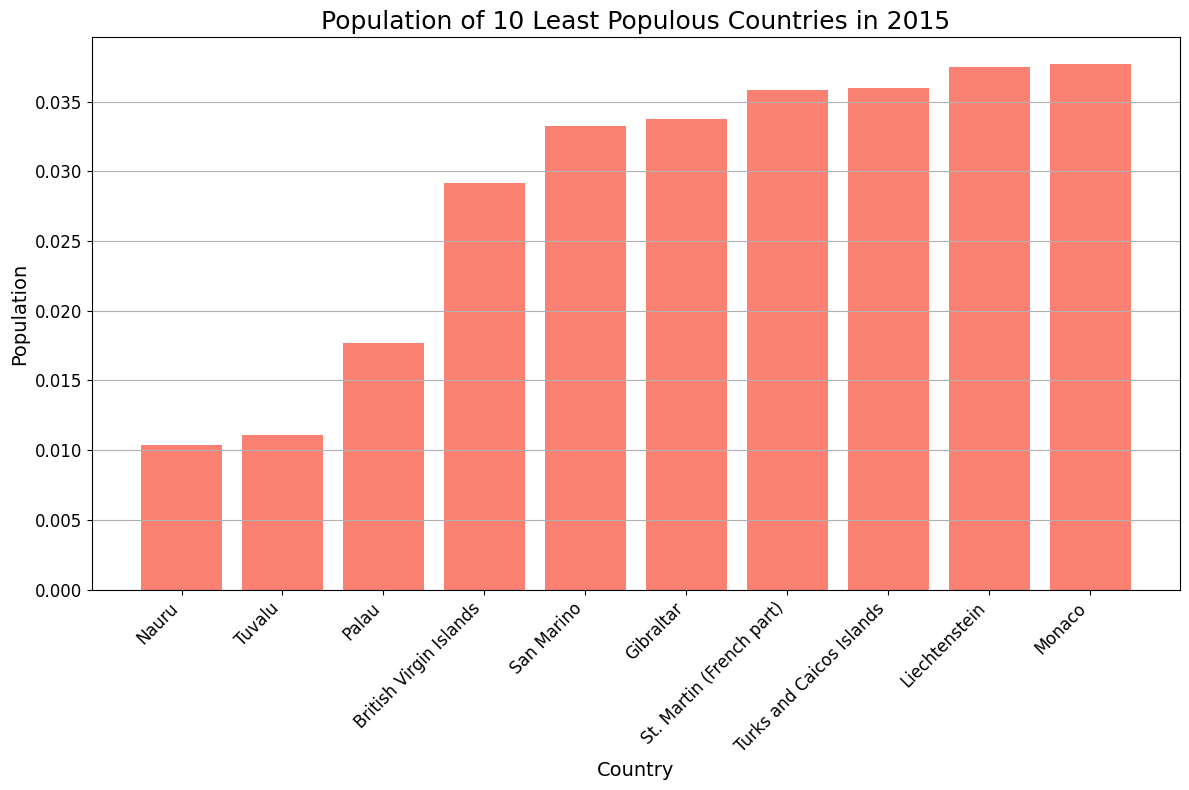

In [60]:
least_populous_2015 = population_data.sort_values (by = 'year_2015').head (10)

plt.figure (figsize = (12, 8))

plt.bar (least_populous_2015 ['country'], least_populous_2015 ['year_2015'] / 1e6, color = 'salmon')

plt.title ('Population of 10 Least Populous Countries in 2015', fontsize = 18)
plt.xlabel ('Country', fontsize = 14)
plt.ylabel ('Population', fontsize = 14)
plt.xticks (rotation = 45, ha = 'right', fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid (axis = 'y')
plt.tight_layout ()
plt.show ()


• Calculate the change in population of Pakistan, India, United States, and United Kingdom from 1970 to 2010 and show the population change (in millions) using a chart.

In [25]:
selected_countries = ['Pakistan', 'India', 'United States', 'United Kingdom']
population_change_1970_2010 = population_data.loc [population_data['country'].isin (selected_countries), ['country', 'year_1970', 'year_2010']]
population_change_1970_2010 ['population_change'] = (population_change_1970_2010 ['year_2010'] - population_change_1970_2010 ['year_1970']) / 1e6

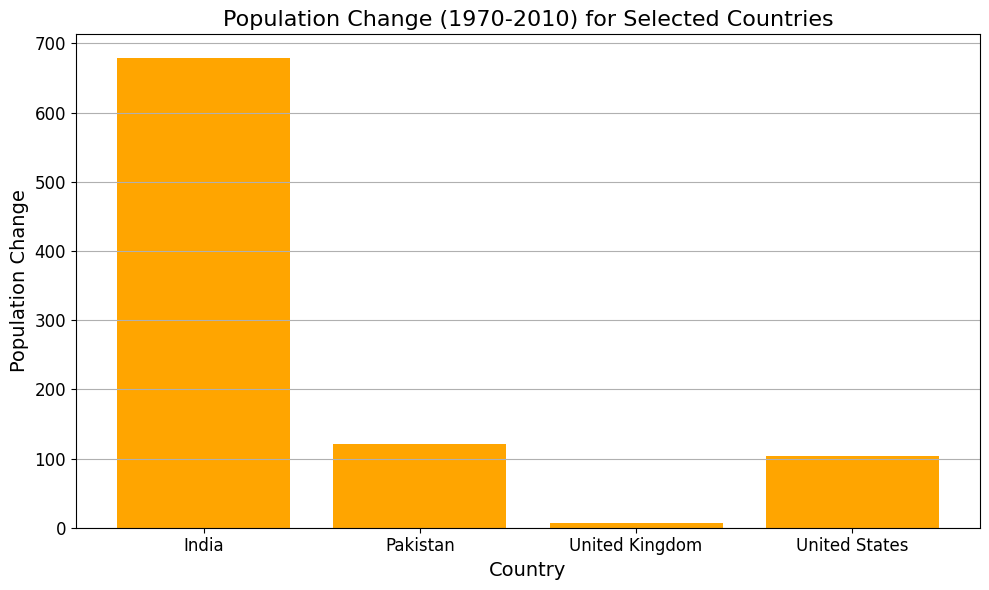

In [62]:
plt.figure (figsize = (10, 6))
plt.bar (population_change_1970_2010 ['country'], population_change_1970_2010 ['population_change'], color = 'orange')
plt.xlabel ('Country', fontsize = 14)
plt.ylabel ('Population Change', fontsize = 14)
plt.title ('Population Change (1970-2010) for Selected Countries', fontsize = 16)
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid (axis = 'y')
plt.tight_layout ()
plt.show ()


• Calculate the Pakistan population growth between 2010-2020 and then show the data using a chart.

In [39]:
pakistan_population_growth = population_data [population_data ['country'] == 'Pakistan'][['year_2010', 'year_2020']]
pakistan_population_growth ['population_growth'] = pakistan_population_growth ['year_2020'] - pakistan_population_growth ['year_2010']

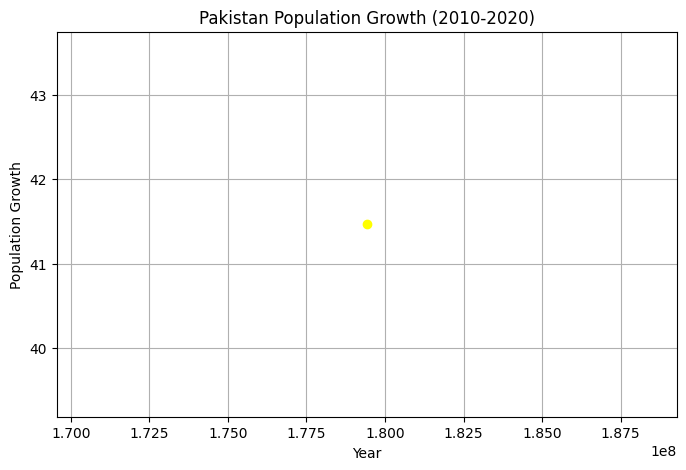

In [40]:
plt.figure (figsize = (8, 5))
plt.plot (pakistan_population_growth ['year_2010'], pakistan_population_growth ['population_growth'] / 1e6, marker = 'o', color = 'yellow')
plt.title ('Pakistan Population Growth (2010-2020)')
plt.xlabel ('Year')
plt.ylabel ('Population Growth')
plt.grid (True)
plt.show ()


Question no. 03: The diamonds dataset contains 53,000 records with various attributes like carat, cut, color, clarity, price etc. Plot the relationship between ‘carat’ and ‘price’ of diamonds using a chart. Because it’s a large dataset, just plot the diamonds with a ‘clarify’ = ‘SI2’ and ‘color’ = ‘E’. Use the values of the ‘cut’ for colors in the plot. Make appropriate modifications to the chart title, axis titles, legend, figure size, font size, colors etc. to make the chart readable and visually appealing.

In [64]:
diamonds_data = pd.read_csv ("diamonds.csv");

filtered_diamonds = diamonds_data [(diamonds_data ['clarity'] == 'SI2') & (diamonds_data ['color'] == 'E')]

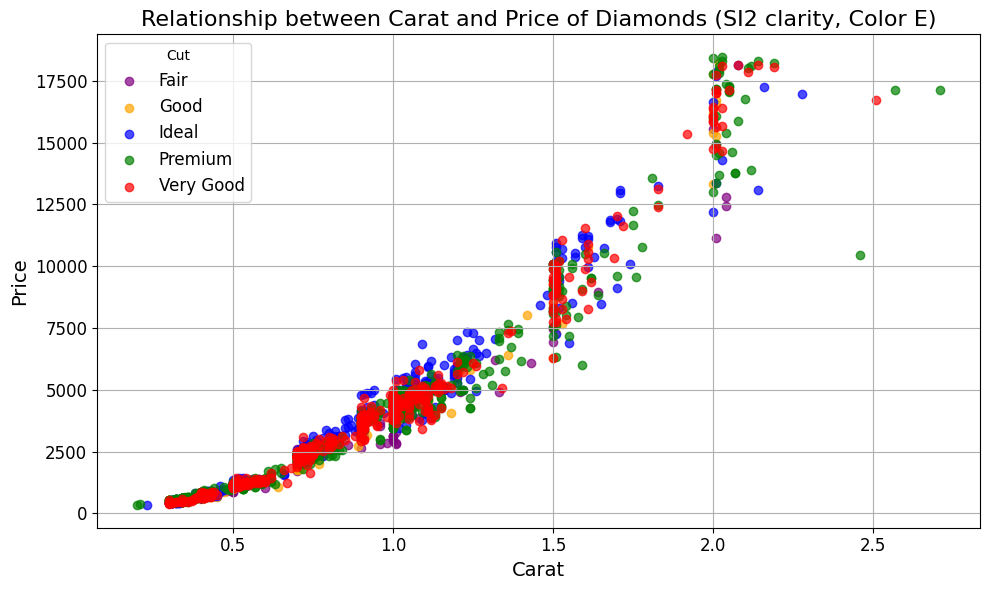

In [72]:
plt.figure(figsize=(10, 6))

cut_colors = {'Ideal': 'blue', 'Premium': 'green', 'Good': 'orange', 'Very Good': 'red', 'Fair': 'purple'}

for cut, group in filtered_diamonds.groupby ('cut'):
    color = cut_colors.get (cut, 'gray')
    plt.scatter (group ['carat'], group ['price'], label = cut, color = color, alpha = 0.7)

plt.title ('Relationship between Carat and Price of Diamonds (SI2 clarity, Color E)', fontsize = 16)
plt.xlabel ('Carat', fontsize = 14)
plt.ylabel ('Price', fontsize = 14)
plt.legend (title = 'Cut', fontsize = 12)
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid (True)
plt.tight_layout ()
plt.show ()

Question no. 04: The nuclear waste dataset contains the locations of several nuclear waste storage sites in the US. Use map of the US to show these sites as markers on the map. Clicking on a marker should display the name of the site. Pick the appropriate location, zoom level and images tiles for the map.

In [50]:
nuclear_waste_data = pd.read_csv ("nuclear_waste_sites.csv");

In [73]:
map_1 = folium.Map (location = [39.8283, -98.5795], zoom_start = 4)

for index, row in nuclear_waste_data.iterrows ():
    folium.Marker (location = [row ['lat'], row ['lon']], popup = row ['text']).add_to (map_1)

In [74]:
map_1

Question no. 05: The Pakistan heritage sites dataset contains the geo locations of a number of heritage sites across Pakistan. Show these sites as markers on a map of the Pakistan. Clicking on a marker should display the name of the site. Pick the appropriate location, zoom level and images tiles for the map.

In [55]:
heritage_sites_data = pd.read_csv ("pak-heritage-sites.csv");

In [75]:
map_2 = folium.Map (location = [30.3753, 69.3451], zoom_start = 6)

for index, row in heritage_sites_data.iterrows ():
    folium.Marker (location = [row [0], row [1]], popup = row [2]).add_to (map_2)

In [59]:
map_2